# MODELLING
## Logistic Regression with Tensorflow Keras
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data

#### Import Libraries and Dataset

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('user_data_source_dropped.csv', sep = ';')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid
0,0,0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,...,0,0,0,0,1,0,0,0,0,a265c05d-6ed6-4991-971e-6ffab1074379
1,1,1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,4d6ebe72-f050-49fd-82fe-a8764bb7a1a2
2,2,2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,...,0,0,0,0,0,0,0,0,1,08744e6e-fec5-4168-bf38-68438dec2f88
3,3,3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,...,0,0,0,0,1,0,0,0,0,f2a873e9-1e28-4db6-9652-cede968ab5d5
4,4,4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,c78d7429-7173-4c60-b911-dd8b10246baa


In [4]:
# df = df.rename(columns={"Unnamed: 0": "id"})
df = df.drop(columns = ['uid', 'Unnamed: 0.1', 'Unnamed: 0'])
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_Male,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
0,1,0.376934,0.005629,0.673512,0.909517,1,0.019455,0.456958,0.022750,0.007009,...,0,0,0,0,0,1,0,0,0,0
1,0,0.552039,0.632270,0.784524,0.948204,1,0.000000,0.000000,0.038576,0.074766,...,1,0,0,0,0,1,0,0,0,0
2,0,0.772855,0.696998,0.783631,0.766422,1,0.077821,0.324991,0.683482,0.271028,...,1,0,0,0,0,0,0,0,0,1
3,0,0.535865,0.550657,0.565476,0.974102,1,0.042802,0.200904,0.092977,0.042056,...,0,0,0,0,0,1,0,0,0,0
4,0,0.786920,0.715760,0.999702,0.688586,1,0.000000,0.000000,0.031652,0.056075,...,1,0,0,0,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   is_scammer                       40717 non-null  int64  
 1   trx_date                         40717 non-null  float64
 2   report_date                      40717 non-null  float64
 3   registereddate                   40717 non-null  float64
 4   birthday                         40717 non-null  float64
 5   is_verified                      40717 non-null  int64  
 6   aqc_freq_prepaid_mobile          40717 non-null  float64
 7   aqc_mean_prepaid_mobile_amount   40717 non-null  float64
 8   aqc_freq_topup                   40717 non-null  float64
 9   aqc_freq_topup_within_7d         40717 non-null  float64
 10  aqc_mean_topup_amount            40717 non-null  float64
 11  aqc_mean_topup_amount_7d         40717 non-null  float64
 12  aqc_mean_topup_amo

#### Dataset Splitting and Shuffling

In [6]:
# Split Train and Validation Dataset
#from sklearn.model_selection import train_test_split
SPLIT_SIZE = 0.7368421

train_len = int(len(df) * SPLIT_SIZE)

shuffled_files = df.sample(frac = 1, random_state = 1)

test_set = shuffled_files[train_len:]
train_set = shuffled_files[:train_len]

y_train = train_set['is_scammer']
x_train = train_set.drop(columns=['is_scammer'])
y_test = test_set['is_scammer']
x_test = test_set.drop(columns=['is_scammer'])

In [7]:
# Convert to tensors
x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [8]:
x_train.shape

TensorShape([30001, 51])

#### Modelling

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu', input_dim=x_train.shape[1]), #Try & Error Hyperparameter
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [10]:
# Main Metrics: F1, precision
# Complementary Metrics: 

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=[
        tf.keras.metrics.Precision(), 
        tf.keras.metrics.Recall(), 
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives()
    ]
)

In [12]:
epoch_count = 150

history = model.fit(
    x_train, 
    y_train, 
    epochs=epoch_count, 
    validation_data=(x_test, y_test) 
#     callbacks=[metrics]
)

Epoch 1/150
938/938 [==============================] - 2s 2ms/step - loss: 0.5965 - precision: 0.8047 - recall: 0.5682 - false_negatives: 6394.0000 - false_positives: 2042.0000 - true_positives: 8415.0000 - true_negatives: 13150.0000 - val_loss: 0.5351 - val_precision: 0.8300 - val_recall: 0.6762 - val_false_negatives: 1697.0000 - val_false_positives: 726.0000 - val_true_positives: 3544.0000 - val_true_negatives: 4749.0000
Epoch 2/150
938/938 [==============================] - 2s 2ms/step - loss: 0.5146 - precision: 0.8030 - recall: 0.7356 - false_negatives: 3916.0000 - false_positives: 2673.0000 - true_positives: 10893.0000 - true_negatives: 12519.0000 - val_loss: 0.4768 - val_precision: 0.8004 - val_recall: 0.7811 - val_false_negatives: 1147.0000 - val_false_positives: 1021.0000 - val_true_positives: 4094.0000 - val_true_negatives: 4454.0000
Epoch 3/150
938/938 [==============================] - 2s 2ms/step - loss: 0.4690 - precision: 0.8145 - recall: 0.7724 - false_negatives: 3371.0

938/938 [==============================] - 2s 3ms/step - loss: 0.3661 - precision: 0.8581 - recall: 0.8116 - false_negatives: 2790.0000 - false_positives: 1987.0000 - true_positives: 12019.0000 - true_negatives: 13205.0000 - val_loss: 0.3831 - val_precision: 0.8058 - val_recall: 0.8580 - val_false_negatives: 744.0000 - val_false_positives: 1084.0000 - val_true_positives: 4497.0000 - val_true_negatives: 4391.0000
Epoch 21/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3651 - precision: 0.8594 - recall: 0.8142 - false_negatives: 2752.0000 - false_positives: 1973.0000 - true_positives: 12057.0000 - true_negatives: 13219.0000 - val_loss: 0.3712 - val_precision: 0.8396 - val_recall: 0.8218 - val_false_negatives: 934.0000 - val_false_positives: 823.0000 - val_true_positives: 4307.0000 - val_true_negatives: 4652.0000
Epoch 22/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3638 - precision: 0.8618 - recall: 0.8125 - false_negatives: 2777.0000 - false

938/938 [==============================] - 2s 2ms/step - loss: 0.3489 - precision: 0.8703 - recall: 0.8184 - false_negatives: 2689.0000 - false_positives: 1807.0000 - true_positives: 12120.0000 - true_negatives: 13385.0000 - val_loss: 0.3571 - val_precision: 0.8562 - val_recall: 0.8224 - val_false_negatives: 931.0000 - val_false_positives: 724.0000 - val_true_positives: 4310.0000 - val_true_negatives: 4751.0000
Epoch 40/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3482 - precision: 0.8690 - recall: 0.8221 - false_negatives: 2635.0000 - false_positives: 1835.0000 - true_positives: 12174.0000 - true_negatives: 13357.0000 - val_loss: 0.3624 - val_precision: 0.8899 - val_recall: 0.7745 - val_false_negatives: 1182.0000 - val_false_positives: 502.0000 - val_true_positives: 4059.0000 - val_true_negatives: 4973.0000
Epoch 41/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3487 - precision: 0.8686 - recall: 0.8206 - false_negatives: 2657.0000 - false

938/938 [==============================] - 2s 2ms/step - loss: 0.3385 - precision: 0.8735 - recall: 0.8229 - false_negatives: 2623.0000 - false_positives: 1765.0000 - true_positives: 12186.0000 - true_negatives: 13427.0000 - val_loss: 0.3610 - val_precision: 0.8890 - val_recall: 0.7792 - val_false_negatives: 1157.0000 - val_false_positives: 510.0000 - val_true_positives: 4084.0000 - val_true_negatives: 4965.0000
Epoch 58/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3379 - precision: 0.8748 - recall: 0.8264 - false_negatives: 2571.0000 - false_positives: 1751.0000 - true_positives: 12238.0000 - true_negatives: 13441.0000 - val_loss: 0.3525 - val_precision: 0.8504 - val_recall: 0.8376 - val_false_negatives: 851.0000 - val_false_positives: 772.0000 - val_true_positives: 4390.0000 - val_true_negatives: 4703.0000
Epoch 59/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3373 - precision: 0.8748 - recall: 0.8240 - false_negatives: 2606.0000 - false

Epoch 76/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3322 - precision: 0.8779 - recall: 0.8260 - false_negatives: 2577.0000 - false_positives: 1701.0000 - true_positives: 12232.0000 - true_negatives: 13491.0000 - val_loss: 0.3496 - val_precision: 0.8755 - val_recall: 0.8092 - val_false_negatives: 1000.0000 - val_false_positives: 603.0000 - val_true_positives: 4241.0000 - val_true_negatives: 4872.0000
Epoch 77/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3311 - precision: 0.8780 - recall: 0.8283 - false_negatives: 2543.0000 - false_positives: 1705.0000 - true_positives: 12266.0000 - true_negatives: 13487.0000 - val_loss: 0.3545 - val_precision: 0.8798 - val_recall: 0.8006 - val_false_negatives: 1045.0000 - val_false_positives: 573.0000 - val_true_positives: 4196.0000 - val_true_negatives: 4902.0000
Epoch 78/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3313 - precision: 0.8772 - recall: 0.8275 - false_negatives: 255

938/938 [==============================] - 2s 2ms/step - loss: 0.3269 - precision: 0.8784 - recall: 0.8305 - false_negatives: 2510.0000 - false_positives: 1702.0000 - true_positives: 12299.0000 - true_negatives: 13490.0000 - val_loss: 0.3518 - val_precision: 0.8597 - val_recall: 0.8256 - val_false_negatives: 914.0000 - val_false_positives: 706.0000 - val_true_positives: 4327.0000 - val_true_negatives: 4769.00008 - recall: 0.8315 - false_negatives: 1996.0000 - false_positives: 1333.0000 - true_positives: 9852.0000 - true_negatives: 1
Epoch 95/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3250 - precision: 0.8823 - recall: 0.8321 - false_negatives: 2487.0000 - false_positives: 1644.0000 - true_positives: 12322.0000 - true_negatives: 13548.0000 - val_loss: 0.3515 - val_precision: 0.8774 - val_recall: 0.8073 - val_false_negatives: 1010.0000 - val_false_positives: 591.0000 - val_true_positives: 4231.0000 - val_true_negatives: 4884.0000
Epoch 96/150
938/938 [==========

Epoch 113/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3224 - precision: 0.8822 - recall: 0.8337 - false_negatives: 2462.0000 - false_positives: 1649.0000 - true_positives: 12347.0000 - true_negatives: 13543.0000 - val_loss: 0.3524 - val_precision: 0.8745 - val_recall: 0.8098 - val_false_negatives: 997.0000 - val_false_positives: 609.0000 - val_true_positives: 4244.0000 - val_true_negatives: 4866.0000
Epoch 114/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3230 - precision: 0.8802 - recall: 0.8305 - false_negatives: 2510.0000 - false_positives: 1674.0000 - true_positives: 12299.0000 - true_negatives: 13518.0000 - val_loss: 0.3500 - val_precision: 0.8706 - val_recall: 0.8149 - val_false_negatives: 970.0000 - val_false_positives: 635.0000 - val_true_positives: 4271.0000 - val_true_negatives: 4840.000016 - recall: 0.8326 - false_negatives: 2264.0000 - false_positives: 1513.0000 - true_positives: 11262.0000 - true_negatives: 1228
Epoch 115/150

938/938 [==============================] - 2s 2ms/step - loss: 0.3200 - precision: 0.8815 - recall: 0.8337 - false_negatives: 2462.0000 - false_positives: 1660.0000 - true_positives: 12347.0000 - true_negatives: 13532.0000 - val_loss: 0.3578 - val_precision: 0.8884 - val_recall: 0.7941 - val_false_negatives: 1079.0000 - val_false_positives: 523.0000 - val_true_positives: 4162.0000 - val_true_negatives: 4952.0000
Epoch 132/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3201 - precision: 0.8832 - recall: 0.8329 - false_negatives: 2474.0000 - false_positives: 1632.0000 - true_positives: 12335.0000 - true_negatives: 13560.0000 - val_loss: 0.3534 - val_precision: 0.8836 - val_recall: 0.8012 - val_false_negatives: 1042.0000 - val_false_positives: 553.0000 - val_true_positives: 4199.0000 - val_true_negatives: 4922.0000 - precision: 0.8847 - recall: 0.8330 - false_negatives: 2227.0000 - false_positives: 1448.0000 - true_positives: 11106.0000 - true_negatives: 1225
Epoch 1

938/938 [==============================] - 2s 2ms/step - loss: 0.3188 - precision: 0.8824 - recall: 0.8365 - false_negatives: 2422.0000 - false_positives: 1651.0000 - true_positives: 12387.0000 - true_negatives: 13541.0000 - val_loss: 0.3581 - val_precision: 0.8952 - val_recall: 0.7853 - val_false_negatives: 1125.0000 - val_false_positives: 482.0000 - val_true_positives: 4116.0000 - val_true_negatives: 4993.0000sion: 0.8800 - recall: 0.8372 - false_negatives: 825.0000 - false_positives: 579.0000 - true_positives: 4244.0000 - tr
Epoch 148/150
938/938 [==============================] - 2s 2ms/step - loss: 0.3193 - precision: 0.8826 - recall: 0.8343 - false_negatives: 2454.0000 - false_positives: 1643.0000 - true_positives: 12355.0000 - true_negatives: 13549.0000 - val_loss: 0.3538 - val_precision: 0.8488 - val_recall: 0.8378 - val_false_negatives: 850.0000 - val_false_positives: 782.0000 - val_true_positives: 4391.0000 - val_true_negatives: 4693.0000
Epoch 149/150
938/938 [==============

#### Evaluation

In [14]:
history.history.keys()

dict_keys(['loss', 'precision', 'recall', 'false_negatives', 'false_positives', 'true_positives', 'true_negatives', 'val_loss', 'val_precision', 'val_recall', 'val_false_negatives', 'val_false_positives', 'val_true_positives', 'val_true_negatives'])

In [15]:
for key in history.history.keys():
    print(str(key) + " : " + str(history.history[key][epoch_count-1]))

loss : 0.31869393587112427
precision : 0.8838275074958801
recall : 0.8332770466804504
false_negatives : 2469.0
false_positives : 1622.0
true_positives : 12340.0
true_negatives : 13570.0
val_loss : 0.35612988471984863
val_precision : 0.8538687825202942
val_recall : 0.8317115306854248
val_false_negatives : 882.0
val_false_positives : 746.0
val_true_positives : 4359.0
val_true_negatives : 4729.0


In [65]:
tr_tp = history.history['true_positives'][epoch_count-1]
tr_tn = history.history['true_negatives'][epoch_count-1]
tr_fp = history.history['false_positives'][epoch_count-1]
tr_fn = history.history['false_negatives'][epoch_count-1]
val_tp = history.history['val_true_positives'][epoch_count-1]
val_tn = history.history['val_true_negatives'][epoch_count-1]
val_fp = history.history['val_false_positives'][epoch_count-1]
val_fn = history.history['val_false_negatives'][epoch_count-1]

train_acc = (tr_tp+tr_tn)/(tr_tp+tr_tn+tr_fp+tr_fn)
val_acc = (val_tp+val_tn)/(val_tp+val_tn+val_fp+val_fn)

tr_prec = history.history['precision'][epoch_count-1]
tr_recall = history.history['recall'][epoch_count-1]
val_prec = history.history['val_precision'][epoch_count-1]
val_recall = history.history['val_recall'][epoch_count-1]

train_f1 = (2*tr_prec*tr_recall)/(tr_prec+tr_recall)
val_f1 = (2*val_prec*val_recall)/(val_prec+val_recall)

In [66]:
print("Training Accuracy: " + str(train_acc))
print("Validation Accuracy: " + str(val_acc))
print("Training F1 score: " + str(train_f1))
print("Validation F1 score: " + str(val_f1))

Training Accuracy: 0.847438418719376
Validation Accuracy: 0.8450914520343412
Training F1 score: 0.8409051396020769
Validation F1 score: 0.8393340912928227


In [16]:
import matplotlib.pyplot as plt

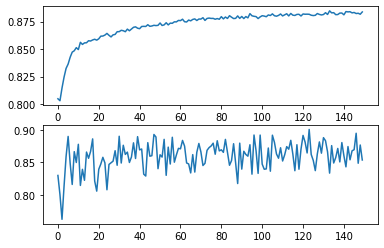

In [17]:
plt.subplot(2,1,1)
plt.plot(history.history['precision'])

plt.subplot(2,1,2)
plt.plot(history.history['val_precision'])

#### Save Model

In [67]:
model.save("log_reg_keras_source_drop.h5")